## K-Means: Bank Customer Clustering for Direct Marketing Campaigns

#### Problem Statement

The data is related with direct marketing campaigns of a Portuguese banking institution. Cluster customers on the basis of attributes.

#### Data:
Only Categorical attributes of Bank Marketing Data Set(UCI Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing) are used for demonstration.

**Attribute Information(Categorical):**

__age__ (numeric)

__job__ : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

__marital__ : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

__education__ (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

__default__: has credit in default? (categorical: 'no','yes','unknown')

__housing__: has housing loan? (categorical: 'no','yes','unknown')

__loan__: has personal loan? (categorical: 'no','yes','unknown')

__contact__: contact communication type (categorical: 'cellular','telephone')

__month__: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

__day_of_week__: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

__poutcome__: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

__UCI Repository__: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

## Data Reading and Understading

In [2]:
bank = pd.read_csv('bankmarketing.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [6]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [7]:
# Converting age into categorical variable.

bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)

In [8]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


### Data Inspection

In [9]:
bank_cust.shape

(41188, 11)

In [10]:
bank_cust.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,9
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,30-40
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,16385


In [11]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  object  
 1   marital      41188 non-null  object  
 2   education    41188 non-null  object  
 3   default      41188 non-null  object  
 4   housing      41188 non-null  object  
 5   loan         41188 non-null  object  
 6   contact      41188 non-null  object  
 7   month        41188 non-null  object  
 8   day_of_week  41188 non-null  object  
 9   poutcome     41188 non-null  object  
 10  age_bin      41188 non-null  category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


### Data Cleaning

In [12]:
# Checking Null values
bank_cust.isnull().sum()*100/bank_cust.shape[0]
# There are no NULL values in the dataset, hence it is clean.

job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
poutcome       0.0
age_bin        0.0
dtype: float64

### Model Building

In [13]:
# First we will keep a copy of data
bank_cust_copy = bank_cust.copy()

#### Data Preparation

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [15]:
# Importing Libraries

from sklearn.cluster import KMeans

In [16]:
km_cao = KMeans(n_clusters = 2,init = 'k-means++')
fitClusters_cao = km_cao.fit_predict(bank_cust)

In [17]:
# Predicted Clusters
fitClusters_cao

array([1, 0, 0, ..., 0, 0, 0])

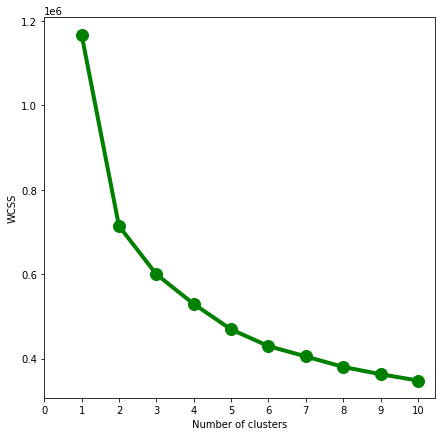

In [18]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(bank_cust)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
# since elbow occured at 5, hence the optimal number of clusters for the mall data is 5 

model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(bank_cust)

#### Combining the predicted clusters with the original DF

In [20]:
bank_cust = bank_cust_copy.reset_index()

In [21]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [22]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60,1
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40,1
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60,0


In [23]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [24]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16072 entries, 1 to 41187
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                16072 non-null  object  
 1   marital            16072 non-null  object  
 2   education          16072 non-null  object  
 3   default            16072 non-null  object  
 4   housing            16072 non-null  object  
 5   loan               16072 non-null  object  
 6   contact            16072 non-null  object  
 7   month              16072 non-null  object  
 8   day_of_week        16072 non-null  object  
 9   poutcome           16072 non-null  object  
 10  age_bin            16072 non-null  category
 11  cluster_predicted  16072 non-null  int32   
dtypes: category(1), int32(1), object(10)
memory usage: 1.4+ MB


In [25]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25116 entries, 0 to 41184
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                25116 non-null  object  
 1   marital            25116 non-null  object  
 2   education          25116 non-null  object  
 3   default            25116 non-null  object  
 4   housing            25116 non-null  object  
 5   loan               25116 non-null  object  
 6   contact            25116 non-null  object  
 7   month              25116 non-null  object  
 8   day_of_week        25116 non-null  object  
 9   poutcome           25116 non-null  object  
 10  age_bin            25116 non-null  category
 11  cluster_predicted  25116 non-null  int32   
dtypes: category(1), int32(1), object(10)
memory usage: 2.2+ MB


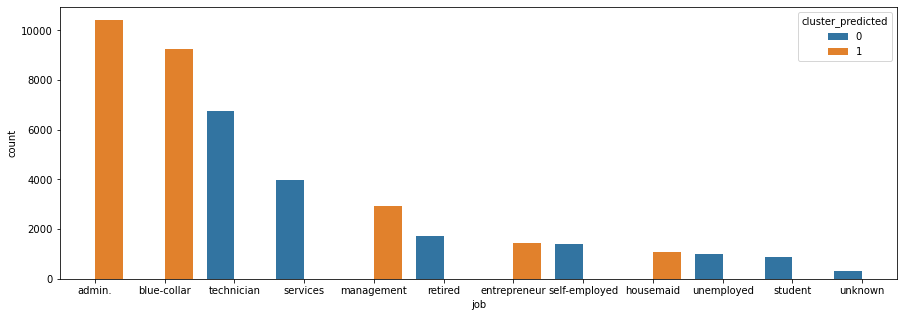

In [26]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()